In [1]:
%matplotlib inline

import datetime
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn  # make charts prettier and more readable

In [2]:
# Let's load one of the csv to see what they look like
nice = pd.read_csv('nice.csv')
nice[:5]

,month,avg_temp,min_temp,max_temp,humidity,rainfall,raindays,snowdays
0,01-2011,8.6,4.8,12.4,67.0,2.9,5,0
1,02-2011,9.3,7.1,11.1,69.1,2.9,5,0
2,03-2011,11.7,7.8,14.3,67.0,3.9,5,0
3,04-2011,15.6,13.3,18.5,67.4,0.4,1,0
4,05-2011,19.7,16.6,24.8,60.6,0.0,0,0


We can see the shape of our csv files.  
There are 8 columns, all pretty explicit and containing the average for the month in column month except for raindays and snowdays which contains the number of days in that month where it rained and snowed respectively.   

Note: I currently count raindays as the number of days where the rainfall is above 5mm (which is completely arbitrary).  
If you look at the website I scraped it does contain a column for rain days  but some days are marked as rain days when there is no rainfall and the reverse.  
Even then it's not really accurate as I'm only interested in quality of life and rain at 4am is not annoying lots of people.  

Cool. Let's try plotting something first to see if everything is okay and load the other cities.


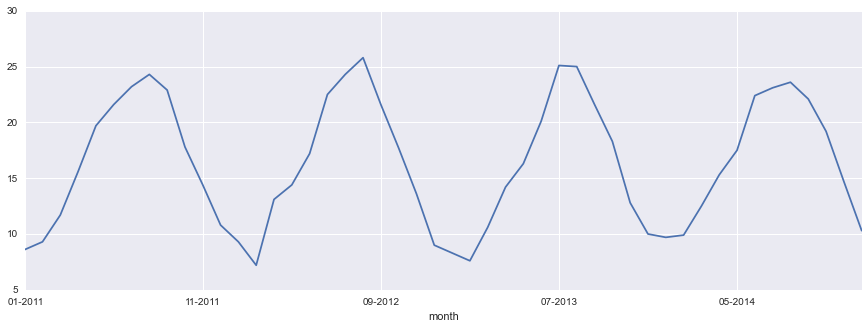

In [4]:
_ = nice['avg_temp'].plot(figsize=(15, 5))

While we could continue having one dataframe per city, it is more convenient to have one dataframe containing all the data as this allows us to use plotting directly from the dataframe like we did above.

In [12]:
locations = ['nice', 'montreal', 'okinawa', 'london']
weather = pd.DataFrame()

for location in locations:
    frame = pd.read_csv('%s.csv' % location)
    # We need to keep track of where it's coming from obviously
    frame['location'] = location
    weather = weather.append(frame)

# Alternative to using iterator
weather.head()

,month,avg_temp,min_temp,max_temp,humidity,rainfall,raindays,snowdays,location
0,01-2011,8.6,4.8,12.4,67.0,2.9,5,0,nice
1,02-2011,9.3,7.1,11.1,69.1,2.9,5,0,nice
2,03-2011,11.7,7.8,14.3,67.0,3.9,5,0,nice
3,04-2011,15.6,13.3,18.5,67.4,0.4,1,0,nice
4,05-2011,19.7,16.6,24.8,60.6,0.0,0,0,nice


We can also use .describe() on a dataframe instead of doing .median(), .sum() etc on every single column to have a quick overview of all the variables.

In [8]:
weather.describe()

,avg_temp,min_temp,max_temp,humidity,rainfall,raindays,snowdays
count,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000
mean,14.698437,9.718750,19.635937,70.260937,3.507292,4.843750,2.114583
std,9.001405,11.141769,7.269971,7.409749,3.491553,3.241834,5.640857
min,-10.000000,-24.900000,1.600000,54.200000,0.000000,0.000000,0.000000
25%,9.150000,4.650000,13.950000,65.300000,1.400000,2.750000,0.000000
50%,16.250000,11.950000,20.950000,69.750000,2.700000,5.000000,0.000000
75%,21.025000,16.600000,25.225000,74.800000,3.900000,7.000000,0.000000
max,29.600000,28.400000,30.700000,87.500000,22.000000,15.000000,25.000000


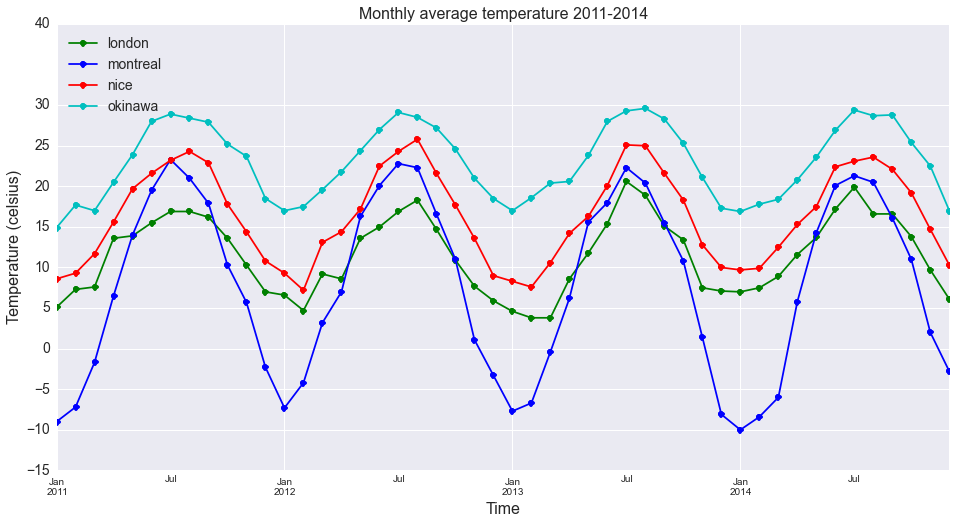

In [29]:
# Define some styles that we will reuse for all line graphs
styles = {
    'london': 'go-',
    'nice': 'ro-',
    'montreal': 'bo-',
    'okinawa': 'co-',
}

# we define a method since we will need to do that pretty often
def plot_grouped_by(dataframe, column_name):
    """Plots the dataframe grouped by location for the given column"""
    # Need to use the month as the index
    locations = dataframe.set_index('month').groupby('location')
    
    for loc_name, loc in locations:
        loc[column_name].plot(x='month', label=str(loc_name), style=styles[str(loc_name)])


plt.figure(figsize=(16, 8))
ax = plt.subplot(111)

plot_grouped_by(weather, 'avg_temp')

# Why yes I did 40 degrees just to be able to fit the legend properly
plt.yticks([-15, -10, -5, 0, 5, 10, 15, 20, 25, 30, 40], fontsize=14)
plt.legend(fontsize=14, loc="upper left")
plt.title("Monthly average temperature 2011-2014", fontsize=16)
_ = plt.ylabel("Temperature (celsius)", fontsize=16) 
_ = plt.xlabel("Time", fontsize=16) 

We can make a few observations on this chart:

- Montreal has the biggest variance in temperature throughout the year: from very cold in winter to quite warm in summer
- London is disappointingly average and is missing at least 10 degrees on its summer time
- Okinawa is hot, even winter is warmer than London's summer most of the time
- Nice has a nice weather, hot in summer but not too cold in winter

For the next plots, let's focus on 2014 only in order to have an idea on how a year looks like in those cities.

In [21]:
# Making sure we have a datetime first rather than a string
weather['month'] = pd.to_datetime(weather['month'], format="%m-%Y")
start = datetime.date(2014, 1,1)

# pandas allows all kind of iterator magic
weather_2014 = weather[weather.month >= start]
weather_2014.head()

,month,avg_temp,min_temp,max_temp,humidity,rainfall,raindays,snowdays,location
36,2014-01-01,9.7,6.4,12.4,71.6,9.2,11,0,nice
37,2014-02-01,9.9,6.8,13.4,69.6,4.6,7,0,nice
38,2014-03-01,12.5,7.4,15.4,62.3,2.7,3,0,nice
39,2014-04-01,15.3,13.2,17.3,69.3,0.3,0,0,nice
40,2014-05-01,17.5,14.4,20.2,64.1,0.6,1,0,nice


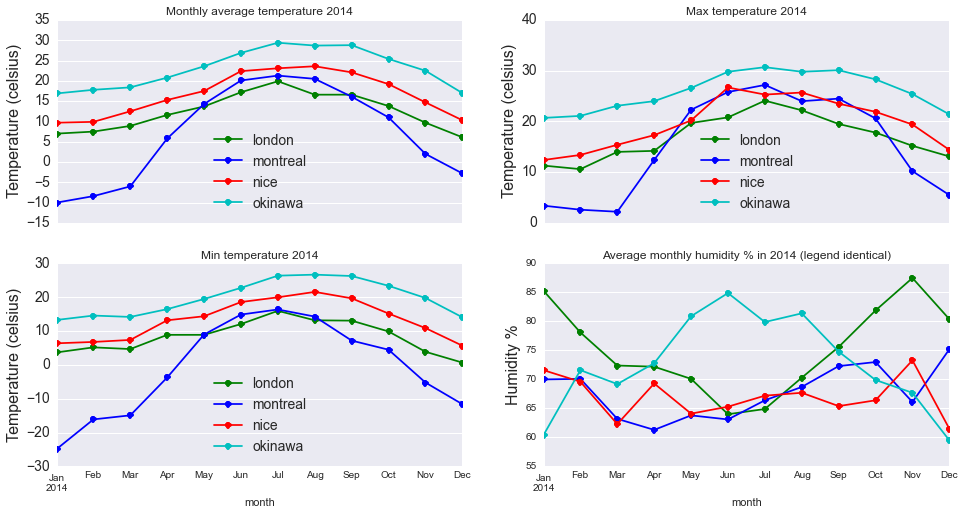

In [22]:
# Let's stop things related to temperatures (humidity is not 
# a temperature obviously but influences how that temperature feels
plt.figure(figsize=(16, 8))

# this 221 means we want a 2x2 plots display and this is the first one (so upper left)
ax = plt.subplot(221)

plot_grouped_by(weather_2014, 'avg_temp')
plt.yticks([-15, -10, -5, 0, 5, 10, 15, 20, 25, 30, 35], fontsize=14)
plt.legend(fontsize=14, loc="lower center")
plt.title("Monthly average temperature 2014")
_ = plt.ylabel("Temperature (celsius)", fontsize=16) 

ax2 = plt.subplot(222)

plot_grouped_by(weather_2014, 'max_temp')
plt.yticks([0, 10, 20, 30, 40], fontsize=14)
plt.legend(fontsize=14, loc="lower center")
plt.title("Max temperature 2014")
_ = plt.ylabel("Temperature (celsius)", fontsize=16) 

ax3 = plt.subplot(223)

plot_grouped_by(weather_2014, 'min_temp')
plt.yticks([-30, -20, -10, 0, 10, 20, 30], fontsize=14)
plt.legend(fontsize=14, loc="lower center")
plt.title("Min temperature 2014")
_ = plt.ylabel("Temperature (celsius)", fontsize=16) 

ax4 = plt.subplot(224)

plot_grouped_by(weather_2014, 'humidity')
plt.title("Average monthly humidity % in 2014 (legend identical)")
_ = plt.ylabel("Humidity %", fontsize=16) 


Looking at those graphs we can notice a few things:

- Montreal winter is pretty damn cold but is not really humid, which makes it not THAT bad and canadians know how to do proper insulation. Summer is quite nice all around, nice temperatures and pretty dry
- Nice is good all year round, it sometimes gets below 10 but never reach 0 while being dry. Having grown up there I feel like I have been spoiled when it comes to weather
- London is average but we can see the winter is very humid, which is the reason why I feel colder when it's 0 in London than -15 in Montreal
- Okinawa looks really good until you see that summer humidity. For those that haven't lived in a tropical climate, it means that you are sweating an awful lot very quickly and air con is a necessity

To finish that notebook, let's have a look at the rain and snow data.


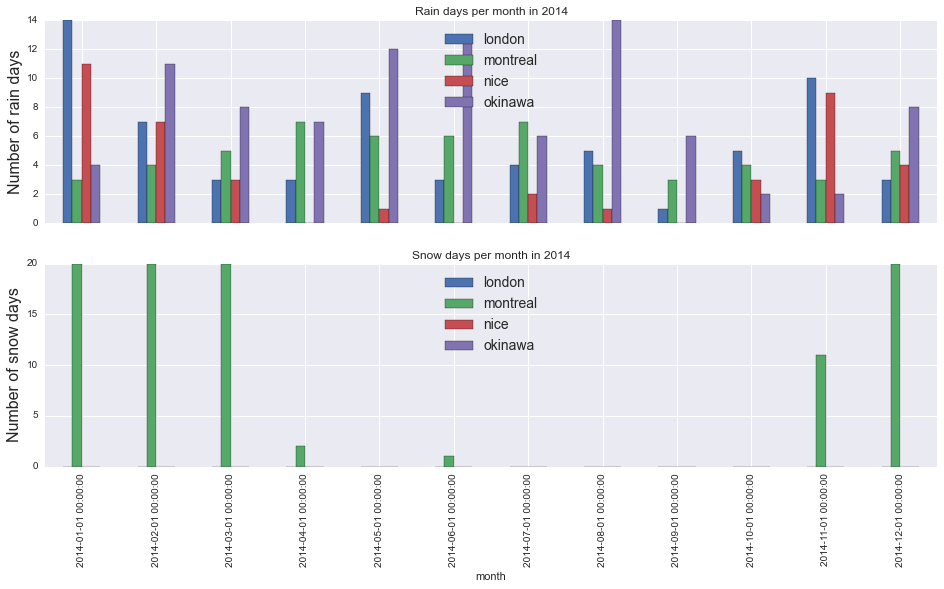

In [78]:

colors = {
    'london': 'green',
    'nice': 'red',
    'montreal': 'blue',
    'okinawa': 'cyan',
}

def bar_plot(ax, column_name):
    weather_2014.set_index(
        ['month', 'location']
    ).unstack().plot(
        ax=ax,
        kind='bar', 
        y=column_name
    )

plt.figure(figsize=(16, 8))
ax = plt.subplot(211)

bar_plot(ax, "raindays")
plt.legend(fontsize=14, loc="best")
plt.title("Rain days per month in 2014")
_ = plt.ylabel("Number of rain days", fontsize=16) 

ax2 = plt.subplot(212)

bar_plot(ax2, "snowdays")
plt.legend(fontsize=14, loc="best")
plt.title("Snow days per month in 2014")
_ = plt.ylabel("Number of snow days", fontsize=16) 

We can see it's raining quite a bit in Okinawa since they have a rainy season (may-june) and a typhoon season (june-november).  
Nice is probably the nicest, having close to no rains during summer.  
When it comes to snow, Montreal is the only contender as snow in Nice and London is very rare and it hasn't snowed in Okinawa for over 30 years.  


While weather is only one of the elements that are necessary to consider when moving (along with salary, atmosphere, friends/family etc), it is one of the most important thing for me.  
If I had to make a ranking of those cities on a weather basis, it will be:

- Nice
- Montreal
- Okinawa/London

Okinawa and London are tied for completely different reasons: one has the legendary british weather and its 2 weeks of summers and the other is so hot and humid that it can be hard to breath at times (but you get amazing sea and beaches).